# Roulette constraint
Examine Roulette scaled mutation rates

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from src import constants as C

In [2]:
_FILE_IN = "data/interim/observed_variants_counts_regions_cov_20.tsv"

In [3]:
plt.style.use(C.STYLE_DEFAULT)
plt.style.use(C.COLOR_REGIONS)

In [4]:
# Read all constraint data
df = pd.read_csv(_FILE_IN, sep="\t").assign(
    n_exp = lambda x: x["pos"] * x["mu_roulette_scaled"],
    oe = lambda x: x["obs"] / x["n_exp"]
)

In [5]:
# Subset to transcript-level data
transcript = df[df.region == "transcript"].copy()
transcript.head()

,enst,csq,region,obs,pos,mu_roulette_scaled,n_exp,oe
161347,ENST00000641515,missense_variant,transcript,36,416,0.209275,87.058342,0.413516
161348,ENST00000641515,synonymous_variant,transcript,12,117,0.279478,32.698949,0.366984
161349,ENST00000641515,stop_gained,transcript,1,19,0.098936,1.879783,0.531976
161350,ENST00000616016,missense_variant,transcript,1377,4181,0.262766,1098.623392,1.253387
161351,ENST00000616016,synonymous_variant,transcript,676,1584,0.342809,543.009868,1.244913


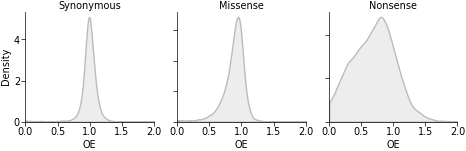

In [6]:
# Plot O/E distributions per transcript

fig, axs = plt.subplots(1, 3, figsize=(12 * C.CM, 4 * C.CM), layout="constrained")

axs = axs.flatten()
csqs = ["synonymous_variant", "missense_variant", "stop_gained"]
labels = ["Synonymous", "Missense", "Nonsense"]

for ax, csq, label in zip(axs, csqs, labels):
    x = transcript[transcript.csq == csq]["oe"]
    sns.kdeplot(ax=ax, x=x, cut=0, fill=True, gridsize=500)
    ax.set_xlim((0, 2))
    ax.set_xlabel("OE")
    ax.set_title(label)
    ax.label_outer()

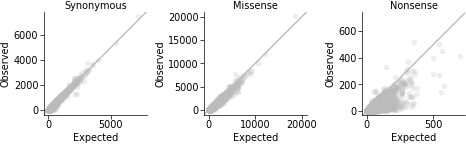

In [7]:
# Plot observed versus expected variant counts

fig, axs = plt.subplots(1, 3, figsize=(12 * C.CM, 4 * C.CM), layout="constrained")

axs = axs.flatten()
csqs = ["synonymous_variant", "missense_variant", "stop_gained"]
labels = ["Synonymous", "Missense", "Nonsense"]

for ax, csq, label in zip(axs, csqs, labels):
    x = transcript[transcript.csq == csq]["n_exp"]
    y = transcript[transcript.csq == csq]["obs"]
    ax.scatter(x=x, y=y, alpha=0.2)
    # ax.set_box_aspect(1)
    # ax.set_aspect("equal", adjustable="datalim", anchor="SW")
    ax.axis("square")
    ax.axline((0,0), slope=1)
    ax.set_xlabel("Expected")
    ax.set_ylabel("Observed")
    ax.set_title(label)

In [8]:
# Test the correlation between observed and expected counts of synonymous variants

synonymous = transcript[transcript.csq == "synonymous_variant"]

x = synonymous.obs
y = synonymous.n_exp

stats.linregress(x,y)

LinregressResult(slope=0.979087041437498, intercept=7.697839166192921, rvalue=0.9924519651154521, pvalue=0.0, stderr=0.0009019761085308126, intercept_stderr=0.3647904086520356)

The R**2 value is substantially greater than with the gnomAD mutational models.